Con este planteamiento, se recogen aquéllas situaciones en las que hay que pasar por trámites sucesivos, con sus correspondientes demoras si hay que hacer cola.

In [1]:
import numpy as np
import random as rnd
import math
import matplotlib.pyplot as plt

In [7]:
# Inicializar variables
t = 0          # Tiempo actual
n_1 = 0        # Número de clientes en el primer servidor
n_2 = 0        # Número de clientes en el segundo servidor
N_LL = 0       # Número total de llegadas al sistema
N_S = 0        # Número total de salidas del sistema

# Listas para almacenar los tiempos de servicio
LL_1 = []  # Lista para almacenar tiempos en el primer servidor
LL = []    # Lista para almacenar tiempos en el segundo servidor

# Generar T_0 (tiempo de llegada del primer cliente)
T_0 = rnd.uniform(0,1)  # Generar un número aleatorio en el rango deseado
t_LL = T_0  # Tiempo de llegada del primer cliente
t_1 = np.inf  # Tiempo de servicio del primer servidor
t_2 = np.inf  # Tiempo de servicio del segundo servidor

In [8]:
# Bucle principal para simular el sistema de colas
while True:
    if t_LL <= t_1 and t_LL <= t_2:
        # Caso 1: Si el tiempo de llegada es menor o igual que los tiempos de servicio
        t = t_LL
        N_LL += 1
        n_1 += 1
        LL_1.append(t)  # Anotar tiempo en el primer servidor
        T_t = rnd.uniform(0.5, 1.5)  # Generar tiempo de llegada del siguiente cliente
        t_LL = T_t  # Actualizar tiempo de llegada

        if n_1 == 1:
            Y = rnd.uniform(1, 2)  # Generar tiempo de servicio para el primer servidor
            t_1 = t + Y  # Actualizar tiempo de servicio del primer servidor

    elif t_LL > t_1 and t_1 <= t_2:
        # Caso 2: Si el primer servidor está ocupado y el segundo está disponible
        t = t_1
        n_1 -= 1
        n_2 += 1
        LL.append(t)  # Anotar tiempo en el segundo servidor

        if n_1 == 0:
            t_1 = np.inf  # Si no hay más clientes, el primer servidor queda libre
        else:
            Y_1 = rnd.uniform(1, 2)  # Generar tiempo de servicio para el siguiente cliente en el primer servidor
            t_1 = t_1 + Y_1  # Actualizar tiempo de servicio del primer servidor

        if n_2 == 1:
            Y_2 = rnd.uniform(1, 2)  # Generar tiempo de servicio para el segundo servidor
            t_2 = t_2 + Y_2  # Actualizar tiempo de servicio del segundo servidor

    elif t_2 < t_1 and t_2 < t_LL:
        # Caso 3: Si el segundo servidor está ocupado
        t = t_2
        N_S += 1
        n_2 -= 1

        if n_2 > 0:
            Y_2 = rnd.uniform(1, 2)  # Generar tiempo de servicio para el siguiente cliente en el segundo servidor
            t_2 = t + Y_2  # Actualizar tiempo de servicio del segundo servidor
        else:
            t_2 = np.inf  # Si no hay más clientes, el segundo servidor queda libre

    # Condición de salida para el bucle
    if N_LL > 200:
        break

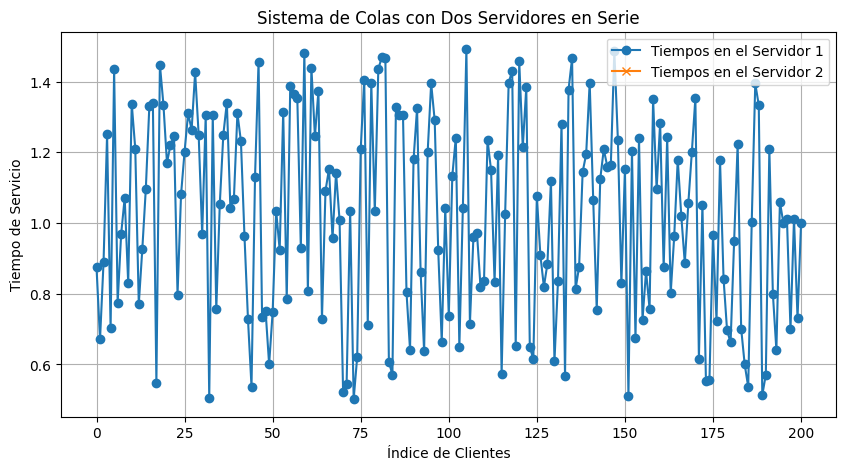

In [14]:
# Visualización
plt.figure(figsize=(10, 5))
plt.plot(LL_1, label='Tiempos en el Servidor 1', marker='o', linestyle='-')
plt.plot(LL, label='Tiempos en el Servidor 2', marker='x', linestyle='-')
plt.xlabel('Índice de Clientes')
plt.ylabel('Tiempo de Servicio')
plt.title('Sistema de Colas con Dos Servidores en Serie')
plt.legend()
plt.grid()
plt.show()